In [1]:
from ViT.model import VisionTransformer, CONFIGS
import torch
import numpy as np

import matplotlib.pyplot as plt

# Available Pretrained Models

Pretrained models in [here](https://console.cloud.google.com/storage/browser/vit_models/imagenet21k?pageState=(%22StorageObjectListTable%22:(%22f%22:%22%255B%255D%22))&prefix=&forceOnObjectsSortingFiltering=false).

- ViT-B_16
- ViT-B_32
- ViT-L_16
- ViT-L_32
- ViT-H_14
- R50-ViT-B_16
- R50-ViT-L_16

In [10]:
class Config:
    img_size         = 224
    vit_patches_size = 16
    vit_name         = 'ViT-L_16'
args = Config()

In [3]:
# model config
config_vit = CONFIGS[args.vit_name]
print('pretrained path: ',config_vit.pretrained_path)

if args.vit_name.find('R50') != -1:
    config_vit.patches.grid = (int(args.img_size / args.vit_patches_size), int(args.img_size / args.vit_patches_size))

pretrained path:  ./model/vit_checkpoint/imagenet21k/ViT-B_32.npz


In [4]:
model = VisionTransformer(config_vit, vis=True)
model.load_from(config_vit)

# Test Inference

In [5]:
inputs = torch.randn(2,3,224,224)
outputs, attn_weights, features = model(inputs)

print('outputs.shape: ',outputs.shape)
print('len(attn_weights): ',len(attn_weights))
print('attn_weights[0].shape: ',attn_weights[0].shape)

outputs.shape:  torch.Size([2, 50, 768])
len(attn_weights):  12
attn_weights[0].shape:  torch.Size([2, 12, 50, 50])


# Visualize a Cosine Similarity Matrix between Position Embeddings

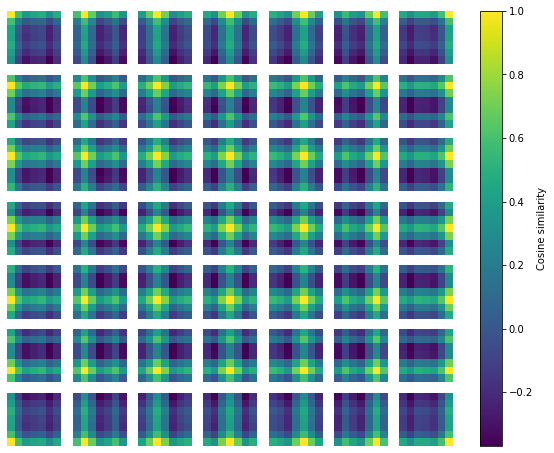

In [6]:
def cos_sim(a, b):
    return np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b))

pos_embed = model.transformer.embeddings.position_embeddings[:,1:,:].squeeze().cpu().detach().numpy()

# cosine similarity
pos_sim = np.zeros((pos_embed.shape[0], pos_embed.shape[0]))
for i in range(pos_embed.shape[0]):
    for j in range(pos_embed.shape[0]):
        pos_sim[i,j] = cos_sim(pos_embed[i], pos_embed[j])

# plotting
num_row, num_col = [args.img_size // args.vit_patches_size] * 2
f, axes = plt.subplots(num_row, num_col, figsize=(10,8))
for i, ax in enumerate(axes.flat):
    im = ax.imshow(pos_sim[i].reshape(num_row, num_col))
    ax.axis('off')

cbar = plt.colorbar(im, ax=axes.ravel().tolist())
cbar.set_label('Cosine similarity')